In [699]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
pd.options.display.float_format = '{:.5f}'.format
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [700]:
#Read the Covid dataset file
data = pd.read_csv('Booksdata.csv')  

In [701]:
#Get the first 5 rows of the data
data.head()

Daily Time Reading Books  Age      Income    Budget  \
0                  68.95000   35 61833.90000 256.09000   
1                  80.23000   31 68441.85000 193.77000   
2                  69.47000   26 59785.94000 236.50000   
3                  74.15000   29 54806.18000 245.89000   
4                  68.37000   35 73889.99000 225.58000   

                             Books Topic            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

                  Date  Buy Books Online  
0  2016-03-27 00:53:11                 0  
1  2016-04-04 01:39:02                 0  
2  2016-03-13 20:35:42                 0  
3  2016-01-10 02:31:19                 0  
4  2016-06-03 03:36:18                 0

In [702]:
#Remove rows with empty values
data = data.dropna()
#Print columns names of the data
print(data.columns)

Index(['Daily Time Reading Books', 'Age', 'Income', 'Budget', 'Books Topic',
       'City', 'Male', 'Country', 'Date', 'Buy Books Online'],
      dtype='object')


In [703]:
#Print False if the data does not contain any null value
print(np.any(data.isna()))

False


In [704]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Reading Books  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Income                    1000 non-null   float64
 3   Budget                    1000 non-null   float64
 4   Books Topic               1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Date                      1000 non-null   object 
 9   Buy Books Online          1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 85.9+ KB


In [705]:
data.describe()

Daily Time Reading Books        Age      Income     Budget       Male  \
count                1000.00000 1000.00000  1000.00000 1000.00000 1000.00000   
mean                   65.00020   36.00900 55000.00008  180.00010    0.48100   
std                    15.85361    8.78556 13414.63402   43.90234    0.49989   
min                    32.60000   19.00000 13996.50000  104.78000    0.00000   
25%                    51.36000   29.00000 47031.80250  138.83000    0.00000   
50%                    68.21500   35.00000 57012.30000  183.13000    0.00000   
75%                    78.54750   42.00000 65470.63500  218.79250    1.00000   
max                    91.43000   61.00000 79484.80000  269.96000    1.00000   

       Buy Books Online  
count        1000.00000  
mean            0.50000  
std             0.50025  
min             0.00000  
25%             0.00000  
50%             0.50000  
75%             1.00000  
max             1.00000

<AxesSubplot:xlabel='Country', ylabel='count'>

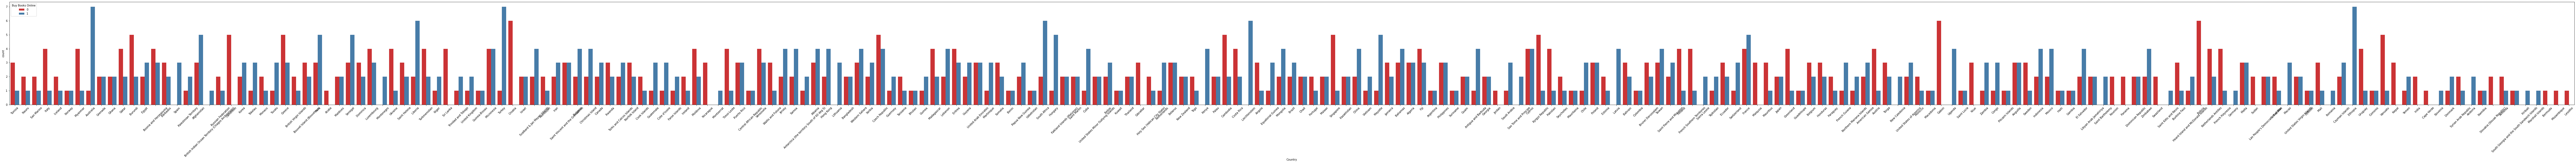

In [706]:
#visualizing Countries that buys books online 
plt.figure(figsize=(170,7)) #170 wide at x axis to avoid override 
plt.xticks(rotation=45) # rotate x axis country names to make more space 
sns.countplot(x='Country',hue='Buy Books Online',data=data,palette='Set1')


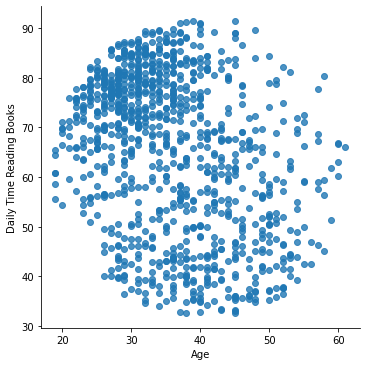

In [707]:
#visualizing daily spent on reading books with age
sns.lmplot(x='Age', y='Daily Time Reading Books', fit_reg = False, data=data)

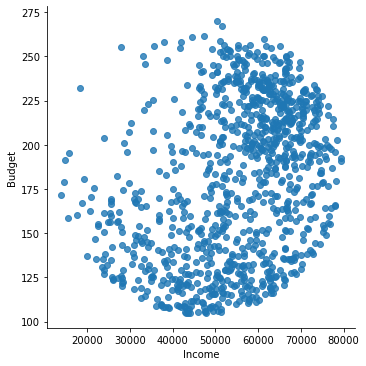

In [708]:
#visualizing the budget with the income
sns.lmplot(x='Income', y='Budget', fit_reg = False, data=data)

In [687]:
#Preprocess the data for machine learning by making the 
#y_data the data we are attempting to predict
y_data = data['Buy Books Online']

#x_data as the data we will be using to make predictions
#We Drop the column we attemp to predict and also the  u nnecessary Columns
x_data = data.drop(['Buy Books Online','Books Topic','Country','City','Date'], axis = 1 )


In [709]:
#Creatie Training Data and Test Data, Test data is 40%
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.4)

In [710]:
model = LogisticRegression(max_iter=1000)
model.fit(x_training_data,y_training_data)

LogisticRegression(max_iter=1000)

In [711]:
predictions = model.predict(x_test_data)

In [712]:
print(classification_report(y_test_data,predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.89       195
           1       0.94      0.85      0.89       205

    accuracy                           0.89       400
   macro avg       0.90      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [713]:
print(confusion_matrix(y_test_data, predictions))


[[183  12]
 [ 31 174]]


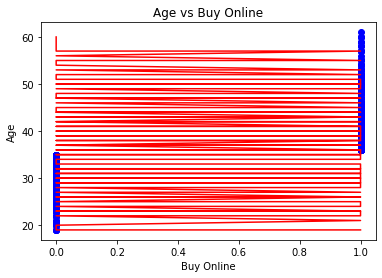

In [729]:
plt.scatter(y_training_data.sort_values(), x_training_data['Age'].sort_values(), color = "blue")
plt.plot(predictions, x_test_data['Age'].sort_values(), color = "red")
plt.title("Age vs Buy Online")
plt.xlabel("Buy Online")
plt.ylabel("Age")
plt.show() 


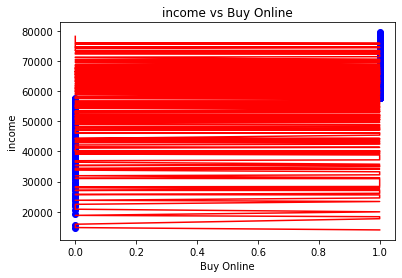

In [733]:
plt.scatter(y_training_data.sort_values(), x_training_data['Income'].sort_values(), color = "blue")
plt.plot(predictions, x_test_data['Income'].sort_values(), color = "red")
plt.title("income vs Buy Online")
plt.xlabel("Buy Online")
plt.ylabel("income")
plt.show() 

In [734]:
tclf = tree.DecisionTreeClassifier()
clf = tclf.fit(x_training_data,y_training_data)

In [735]:
tree_predictions = tclf.predict(x_test_data)

In [736]:
print(classification_report(y_test_data,tree_predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       195
           1       0.96      0.94      0.95       205

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



[Text(334.79999999999995, 830.2254545454546, 'X[3] <= 173.46\ngini = 0.5\nsamples = 600\nvalue = [309, 291]'),
 Text(162.3272727272727, 751.1563636363636, 'X[0] <= 71.39\ngini = 0.124\nsamples = 271\nvalue = [18, 253]'),
 Text(81.16363636363636, 672.0872727272728, 'X[2] <= 76939.027\ngini = 0.017\nsamples = 234\nvalue = [2, 232]'),
 Text(40.58181818181818, 593.0181818181818, 'gini = 0.0\nsamples = 232\nvalue = [0, 232]'),
 Text(121.74545454545454, 593.0181818181818, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(243.49090909090907, 672.0872727272728, 'X[2] <= 50110.109\ngini = 0.491\nsamples = 37\nvalue = [16, 21]'),
 Text(202.90909090909088, 593.0181818181818, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(284.07272727272726, 593.0181818181818, 'X[3] <= 146.58\ngini = 0.423\nsamples = 23\nvalue = [16, 7]'),
 Text(243.49090909090907, 513.949090909091, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(324.6545454545454, 513.949090909091, 'X[1] <= 48.5\ngini = 0.198\nsamples = 18

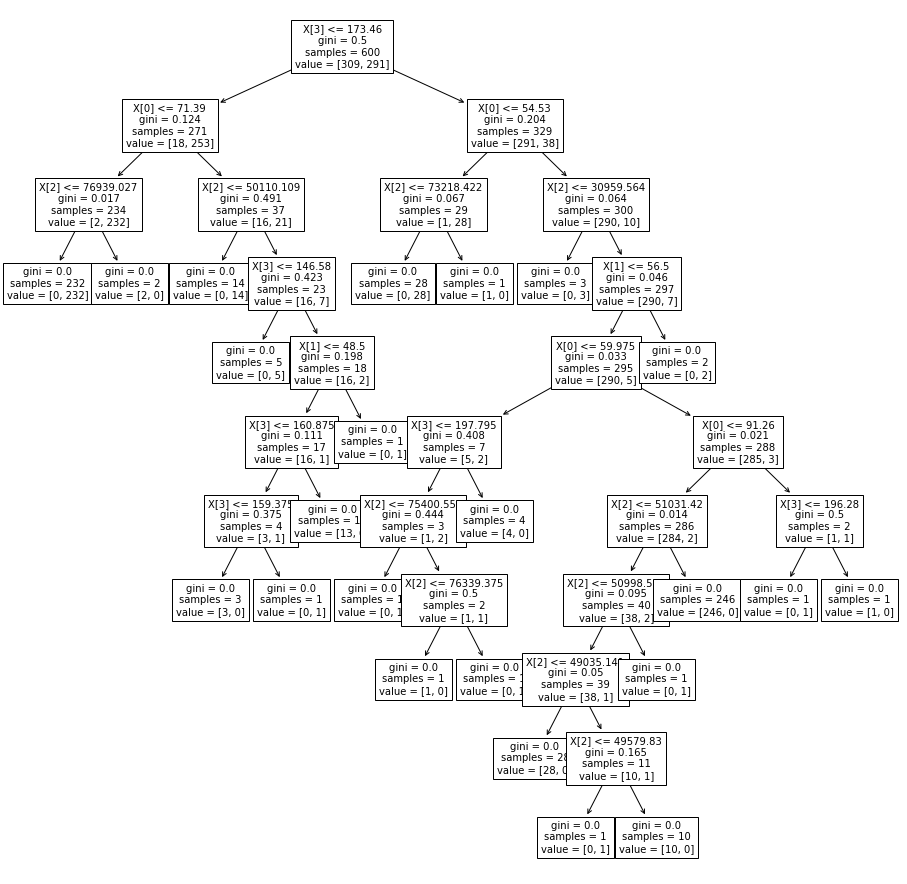

In [674]:
plt.figure(figsize=(16,16))
tree.plot_tree(clf, fontsize=10)